<a href="https://colab.research.google.com/github/June24-Wu/Thunder/blob/main/GroupCodingProjects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

## HW: Deep Learning ##

Note:  Anaconda Python <https://www.anaconda.com/distribution/> is a strong implementation of python.

### imports and graphics configurations ###

In [1]:
import numpy
import pandas
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
import numpy as np

In [2]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5,
}
plt.rcParams.update(params)

# **Technology** #

**Technology:** Compute $\cos(k\pi/10)$ for $k\in \{0,1,2,\dots 20\}$

In [ ]:
import math
for k in range(21):
  print(math.cos(k * math.pi / 10))

1.0
0.9510565162951535
0.8090169943749475
0.5877852522924731
0.30901699437494745
6.123233995736766e-17
-0.30901699437494734
-0.587785252292473
-0.8090169943749473
-0.9510565162951535
-1.0
-0.9510565162951538
-0.8090169943749476
-0.5877852522924732
-0.30901699437494756
-1.8369701987210297e-16
0.30901699437494723
0.5877852522924729
0.8090169943749473
0.9510565162951535
1.0


# **Linear Regression** #

**Manual Linear Regression** Consider linear regression of price upon the feature set
* Square Feet
* number of Beds
* number of Baths
* Year built
* HOA/Month

Carry out (multivariable) linear regression on all of these features, using
* sklearn
* the explicit formula (which you should derive)
* a gradient descent algorithm.

**Feature Importance** Consider linear regression of price upon the feature set
* Square Feet
* number of Beds
* number of Baths
* Year built
* HOA/Month

One by one, remove each of these features and repeat linear regression.
* Rank features by how the loss (mean square error) changes as each of the features is removed
* Rank features by how the metric (mean absolute error) changes as each of the features is removed

In [3]:
def getfile(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pandas.read_csv(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out=pandas.read_csv(loc,**kwargs)
    return out

fname=("redfin_data.csv","https://drive.google.com/file/d/1ei7JaZ4M1lrw3TyYcWozESi8HrHccnUx/view?usp=sharing")
data=getfile(fname)
data = data[["SQUARE FEET","BEDS","BATHS","YEAR BUILT","HOA/MONTH","PRICE"]].dropna()
data

local file not found; accessing Google Drive


,SQUARE FEET,BEDS,BATHS,YEAR BUILT,HOA/MONTH,PRICE
0,2000.0,3.0,2.5,1928.0,660.0,549000
1,2138.0,2.0,2.5,2002.0,1250.0,925000
3,1426.0,2.0,2.0,1980.0,446.0,315000
11,900.0,2.0,1.0,1920.0,298.0,150000
12,1400.0,2.0,2.0,1980.0,495.0,299000
13,1060.0,2.0,2.0,2000.0,718.0,315000
17,1660.0,2.0,2.5,1990.0,659.0,425000
18,800.0,1.0,1.0,1920.0,357.0,159000
22,1650.0,3.0,2.0,1967.0,463.0,339000
23,1475.0,2.0,2.0,1969.0,421.0,390000


In [15]:

# Normalize the input variables by dividing each column by the maximum values of that column.
X = data.drop("PRICE",axis=1)
for i in X.columns:
    X[i] = (X[i] - np.mean(X[i])) / np.std(X[i])
Y = (data["PRICE"] - np.mean(data["PRICE"])) / np.std(data["PRICE"])

"""sklearn"""
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, Y)
print(linreg.intercept_)
print(linreg.coef_)

-1.0893666662929732e-16
[ 0.5331582  -0.21009171  0.42902146  0.01638929  0.16891623]


In [16]:
Y

0     1.527598
1     3.918292
3     0.039772
11   -1.009336
12   -0.061960
13    0.039772
17    0.739177
18   -0.952112
22    0.192370
23    0.516639
24    0.643804
25    0.898133
27   -0.056237
30   -0.888530
32    0.675595
34   -0.246348
35   -0.214557
36   -0.373513
39    0.898133
40    0.453057
42    0.891775
43   -0.468886
44    1.336851
45   -0.977545
46   -0.716857
49    0.103354
50   -1.104709
51    0.065205
52   -0.056237
53    0.446699
54   -1.002978
55   -0.850380
56    0.166937
58   -0.882807
61   -0.532469
66   -1.327883
69    1.375000
71   -1.308173
76   -1.460770
77   -1.201672
80   -0.580155
82    0.192370
88    0.065205
90    1.120671
92    0.675595
95   -1.168292
96   -0.946389
99    1.406791
Name: PRICE, dtype: float64

In [17]:
linreg.predict(X)

array([ 1.37845101,  2.37747106,  0.41234906, -1.19471639,  0.41601302,
        0.14813827,  1.275814  , -0.96249841,  0.39765551,  0.45249641,
        0.50883444,  0.598687  ,  0.23970488, -0.98577865,  0.50569692,
       -0.45238336,  1.25950338, -0.7112728 ,  0.84252484,  1.06039269,
        0.3817262 , -1.18934262,  1.60437644, -0.83344367, -0.81876205,
       -0.0466526 , -0.82777556, -0.0592257 ,  0.338019  ,  0.34262913,
       -1.20685057, -0.96861028, -0.91441818, -0.21998515, -0.72163351,
       -0.14185701,  0.50880563, -0.96415232, -0.59350272, -0.98749387,
       -0.38931385, -0.08852794, -0.04666909,  0.61665569,  0.33830733,
       -0.82296091, -1.13661225,  1.28018757])

In [5]:
"""
the explicit formula (which you should derive)
"""
# Initiate the theta values.
theta = np.array([0]*len(X.columns))

m = len(data)
# Define the hypothesis function
def hypothesis(theta, X):
    return theta*X

def computeCost(X, y, theta,m):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*m)

def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta,m)
        J.append(j)
        k += 1
    return J, j, theta
J, j, theta = gradientDescent(X, Y, theta, 0.05, 100)
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)
y_hat

0     205579.862881
1     349315.710413
3      62327.759264
11   -185422.657670
12     64180.952335
13     41855.545655
17    193067.196799
18   -168752.577085
22     71860.469831
23     64098.440830
24     87848.469274
25    100310.289305
27     35911.325899
30   -149621.109105
32     80203.034782
34    -74355.896092
35    171555.562418
36   -115107.788881
39    132058.099269
40    162733.794525
42     56258.742728
43   -180457.537421
44    253964.122345
45   -142653.815831
46   -133350.530373
49     -1123.648165
50   -119984.119561
51     -8225.803996
52     58388.893800
53     67940.381177
54   -181318.519486
55   -151517.725503
56   -143075.948370
58    -36186.678465
61   -115759.138660
66    -13459.734533
69     76429.106576
71   -160324.127915
76    -83195.841443
77   -146285.524269
80    -59918.821023
82     -1818.299346
88     11031.333343
90    117415.094538
92     60735.318482
95   -129161.494428
96   -193912.884711
99    169920.715862
dtype: float64

In [34]:
import torch
features=torch.from_numpy(X.values.astype(numpy.float32))
labels=torch.from_numpy(Y.values.astype(numpy.float32).reshape(-1,1))
print("features.shape : " , features.shape)
print("labels.shape : " , labels.shape)
print("cuda available: {:}".format(torch.cuda.is_available()))
features = features.cuda() if torch.cuda.is_available() else features
labels = labels.cuda() if torch.cuda.is_available() else labels

features.shape :  torch.Size([48, 5])
labels.shape :  torch.Size([48, 1])
cuda available: False


In [30]:

learningRate=0.075
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize=1, outputSize=1,SEED=0): #default to one-dimensional feature and response
        super().__init__() #run init of torch.nn.Module
        if SEED is not None:
          torch.manual_seed(SEED)
        self.linear = torch.nn.Linear(inputSize,outputSize)
        if torch.cuda.is_available():
          self=self.cuda()

    def forward(self, x):
        out=self.linear(x)
        return out

model=linearRegression(inputSize = 5 , outputSize = 1)

Loss = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [31]:
MAX_iter = 100
starttime=time.time()
for itr in range(MAX_iter):

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(features)

    # get loss for the predicted output
    lossvalue = Loss(outputs, labels)

    # get gradients w.r.t to parameters
    lossvalue.backward()
    #print(model.linear.weight.grad.item(),model.linear.bias.grad.item())

    # update parameters
    optimizer.step()
    if itr % 10 ==0:
      print(f"iteration {itr}: loss={lossvalue.item()}")
      
endtime=time.time()
print("\nexecution time: {0:.5f} seconds".format(endtime-starttime))

iteration 0: loss=2.0738909244537354
iteration 10: loss=0.33176565170288086
iteration 20: loss=0.28626981377601624
iteration 30: loss=0.2725318372249603
iteration 40: loss=0.2674623429775238
iteration 50: loss=0.26554083824157715
iteration 60: loss=0.264792263507843
iteration 70: loss=0.2644880414009094
iteration 80: loss=0.26435670256614685
iteration 90: loss=0.264295369386673

execution time: 0.03471 seconds


In [33]:
(m_pt,b_pt)=(model.linear.weight,model.linear.bias)
print((m_pt,b_pt))

(Parameter containing:
tensor([[ 0.5197, -0.2014,  0.4348,  0.0199,  0.1687]], requires_grad=True), Parameter containing:
tensor([1.6413e-08], requires_grad=True))


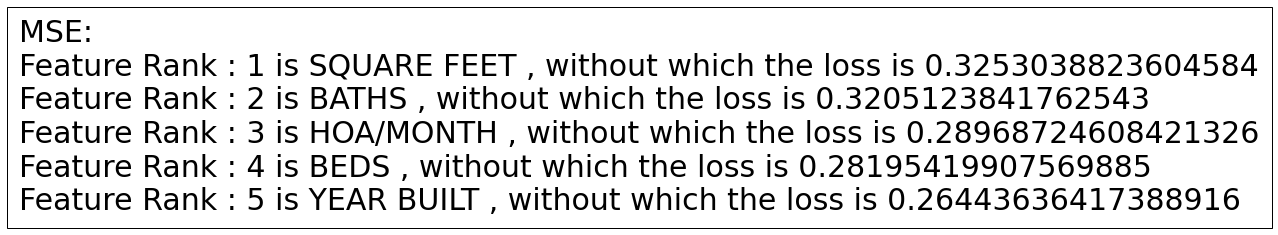

In [51]:
def textbox(txt,fname=None):
    plt.figure(figsize=(1,1))
    plt.gca().add_artist(offsetbox.AnchoredText("\n".join(txt), loc="center",prop=dict(size=30)))
    plt.axis('off')
    if fname is not None:
        saver(fname)
    plt.show()
    plt.close()

ans = []
for i in X.columns:
  features= X.drop(i,axis=1)
  features=torch.from_numpy(features.values.astype(numpy.float32))
  labels=torch.from_numpy(Y.values.astype(numpy.float32).reshape(-1,1))
  # print("features.shape : " , features.shape)
  # print("labels.shape : " , labels.shape)

  learningRate=0.075
  class linearRegression(torch.nn.Module):
      def __init__(self, inputSize=1, outputSize=1,SEED=0): #default to one-dimensional feature and response
          super().__init__() #run init of torch.nn.Module
          if SEED is not None:
            torch.manual_seed(SEED)
          self.linear = torch.nn.Linear(inputSize,outputSize)
          if torch.cuda.is_available():
            self=self.cuda()

      def forward(self, x):
          out=self.linear(x)
          return out

  model=linearRegression(inputSize = features.shape[1] , outputSize = labels.shape[1])

  Loss = torch.nn.MSELoss() 
  optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
  MAX_iter = 100
  starttime=time.time()
  for itr in range(MAX_iter):

      # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
      optimizer.zero_grad()

      # get output from the model, given the inputs
      outputs = model(features)

      # get loss for the predicted output
      lossvalue = Loss(outputs, labels)

      # get gradients w.r.t to parameters
      lossvalue.backward()
      #print(model.linear.weight.grad.item(),model.linear.bias.grad.item())

      # update parameters
      optimizer.step()
      # if itr % 10 ==0:
      #   print(f"iteration {itr}: loss={lossvalue.item()}")
  endtime=time.time()
  # print("\nexecution time: {0:.5f} seconds".format(endtime-starttime))
  ans.append((lossvalue.item(),i))
ans.sort()
# print(ans)
text=[]
text.append("MSE:")
for i in range(len(ans)-1,-1,-1):
  text.append(f"Feature Rank : {len(ans) - i} is {ans[i][1]} , without which the loss is {ans[i][0]}")
textbox(text)

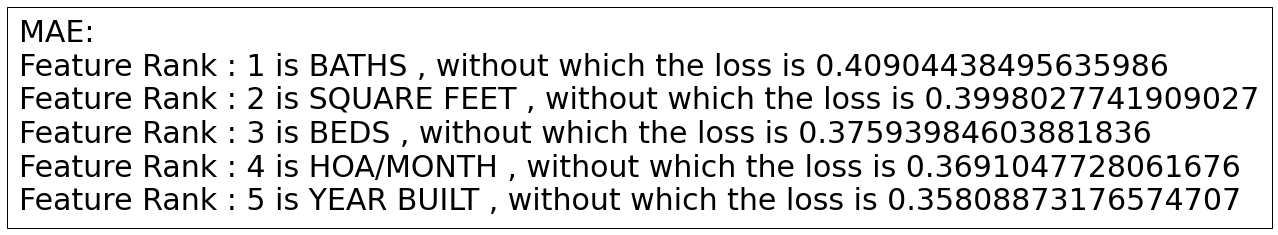

In [52]:
def textbox(txt,fname=None):
    plt.figure(figsize=(1,1))
    plt.gca().add_artist(offsetbox.AnchoredText("\n".join(txt), loc="center",prop=dict(size=30)))
    plt.axis('off')
    if fname is not None:
        saver(fname)
    plt.show()
    plt.close()

ans = []
for i in X.columns:
  features= X.drop(i,axis=1)
  features=torch.from_numpy(features.values.astype(numpy.float32))
  labels=torch.from_numpy(Y.values.astype(numpy.float32).reshape(-1,1))
  # print("features.shape : " , features.shape)
  # print("labels.shape : " , labels.shape)

  learningRate=0.075
  class linearRegression(torch.nn.Module):
      def __init__(self, inputSize=1, outputSize=1,SEED=0): #default to one-dimensional feature and response
          super().__init__() #run init of torch.nn.Module
          if SEED is not None:
            torch.manual_seed(SEED)
          self.linear = torch.nn.Linear(inputSize,outputSize)
          if torch.cuda.is_available():
            self=self.cuda()

      def forward(self, x):
          out=self.linear(x)
          return out

  model=linearRegression(inputSize = features.shape[1] , outputSize = labels.shape[1])

  Loss = torch.nn.L1Loss() 
  optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
  MAX_iter = 100
  starttime=time.time()
  for itr in range(MAX_iter):

      # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
      optimizer.zero_grad()

      # get output from the model, given the inputs
      outputs = model(features)

      # get loss for the predicted output
      lossvalue = Loss(outputs, labels)

      # get gradients w.r.t to parameters
      lossvalue.backward()
      #print(model.linear.weight.grad.item(),model.linear.bias.grad.item())

      # update parameters
      optimizer.step()
      # if itr % 10 ==0:
      #   print(f"iteration {itr}: loss={lossvalue.item()}")
  endtime=time.time()
  # print("\nexecution time: {0:.5f} seconds".format(endtime-starttime))
  ans.append((lossvalue.item(),i))
ans.sort()
# print(ans)
text=[]
text.append("MAE:")
for i in range(len(ans)-1,-1,-1):
  text.append(f"Feature Rank : {len(ans) - i} is {ans[i][1]} , without which the loss is {ans[i][0]}")
textbox(text)

# **Logistic Regression** #

**Transition Layer Width** Take $N=200$ Gaussian points on the line centered at 0 and with mean 1.  Assign label 1 to the ones to the right of the origin and assign label 0 to the ones on the left of the origin.  Carry out the following with PyTorch
* Carry out logistic regression, and note the width of the transition layer.
* Flip 5 points on each side of the origin to the 'wrong' label and note the width of the transition layer
* Flip 5 more points on each side of the origin to the 'wrong' label and note the width of the transition layer
* Repeat this for 15, 20, 25, 30, 35 points and plot the width of the transition layer as a function of the number of points with the 'wrong' label.

**Biased Data** Regress property type (single family residential or not) on square footage and price for both Evanston and Champaign.  Compare performances.  Also note biases in datasets (Champaign may have proportionally more single-family residences than Evanston).


# **Stochastic Gradient Descent** #

**Batch Size** Consider N data points, and a batch algorithm with batch size B.  Let E be the expected epoch size; i.e., the expected number of iterations I needed for all data points to be in the first I batches.
* Fix N=100 and compute (and plot) E for B=10,25,50
* Fix N=200 and compute (and plot) E for B=10,25,50,100

**Multiple Minima** Define
$$f(x)=\sin(x)$$
starting at $x=0$.  Carry out gradient descent to minimize $f$.
* Construct a learning schedule which leads to the minimum at $x=3\pi/2$
* Construct a learning schedule which leads to the minimum at $x=-\pi/2$



```
# This is formatted as code
```

# **Backpropagation** #

**Numerical Backpropagation** Define
$\phi_n(x)= \cos(2^nx)$ for $x\in R$ and $n\in \{1,2,3\}$.  Set $x=5$ and define
$$f_5(m_1,m_2,m_3)= \exp\left[\pi \phi_3(m_3\phi_2(m_2\phi_1(m_1x)))\right]$$
for $(m_1,b_1.m_2,b_2.m_3,b_3)\in R^6$.
* Numerically compute $\lim_{\varepsilon\to 0}\{f_5(10,9,8+\varepsilon)-f_5(10,9,8)\}/\varepsilon$
* Compute $\frac{\partial f_5}{\partial m_3}(10,9,8)$ using pytorch
* Numerically compute $\lim_{\varepsilon\to 0}\{f_5(10,9+\varepsilon,8)-f_5(10,9,8)\}/\varepsilon$
* Compute $\frac{\partial f_5}{\partial m_2}(10,9,8)$ using pytorch
* Numerically compute $\lim_{\varepsilon\to 0}\{f_5(10+\varepsilon,9,8)-f_5(10,9,8)\}/\varepsilon$
* Compute $\frac{\partial f_5}{\partial m_1}(10,9,8)$ using pytorch.

**Numerical Backpropagation with bias** Define
$\phi_n(x)= \cos(2^nx)$ for $x\in R$ and $n\in \{1,2,3\}$.  Set $x=5$ and define
$$f_5(m_1,b_1,m_2,b_2,m_3,b_3)= \exp\left[\pi \phi_3(m_3\phi_2(m_2\phi_1(m_1x+b_1)+b_2)+b_3)\right]$$
for $(m_1,b_1.m_2,b_2.m_3,b_3)\in R^6$.
* Numerically compute $\lim_{\varepsilon\to 0}\{f_5(10,1,9,2,8+\varepsilon,3)-f_5(10,1,9,2,8,3)\}/\varepsilon$
* Compute $\frac{\partial f_5}{\partial m_3}(10,1,9,2,8,3)$ using pytorch
* Numerically compute $\lim_{\varepsilon\to 0}\{f_5(10,1,9,2,8,3+\varepsilon)-f_5(10,1,9,2,8,3)\}/\varepsilon$
* Compute $\frac{\partial f_5}{\partial b_3}(10,1,9,2,8,3)$ using pytorch
* Numerically compute $\lim_{\varepsilon\to 0}\{f_5(10,1,9+\varepsilon,2,8,3)-f_5(10,1,9,2,8,3)\}/\varepsilon$
* Compute $\frac{\partial f_5}{\partial m_2}(10,1,9,2,8,3)$ using pytorch
* Numerically compute $\lim_{\varepsilon\to 0}\{f_5(10,1,9,2+\varepsilon,8,3)-f_5(10,1,9,2,8,3)\}/\varepsilon$
* Compute $\frac{\partial f_5}{\partial b_2}(10,1,9,2,8,3)$ using pytorch
* Numerically compute $\lim_{\varepsilon\to 0}\{f_5(10,+\varepsilon,1,9,2,8,3)-f_5(10,1,9,2,8,3)\}/\varepsilon$
* Compute $\frac{\partial f_5}{\partial m_1}(10,1,9,2,8,3)$ using pytorch
* Numerically compute $\lim_{\varepsilon\to 0}\{f_5(10,1+\varepsilon,9,2,8,3)-f_5(10,1,9,2,8,3)\}/\varepsilon$
* Compute $\frac{\partial f_5}{\partial b_1}(10,1,9,2,8,3)$ using pytorch

**One-dimensional with bias** Define $\phi_n(x)=\cos(2^nx)$ for $x\in R$ and $n\in\{1,2,3\}$.  Define
$$f_x(m_1,b_1,m_2,b_2,m_3,b_3)= \exp\left[\pi \phi_3(m_3\phi_2(m_2\phi_1(m_1x+b_1)+b_2)+b_3)\right]$$
and set $x=5$.
* Explicitly write out the backpropagation formula to compute the sensitivity of $f_5$ with respect to the $m_n$'s and $b_n$'s at 
$$ (m_1,b_1,m_2,b_2,m_3,b_3)=(10,11,9,19,8,18)$$
* Use pytorch to check your answers

**Multidimensional** Define $\phi_n(x)=\cos(2^nx)$ for $x\in R$ and $n\in\{1,2,3\}$ and define $L(x)=\exp(-5x)$.  For $x\in R^4$, $M^{(1)}\in R^{3\times 4}$, $B^{(1)}\in R^3$, $M^{(2)}\in R^{2\times 3}$, $B^{(2)}\in R^2$, and $M^{(3)}\in R^{2\times 1}$ and $B^{(3)}\in R$, define
$$f_x(M^{(1)},B^{(1)},M^{(2)},B^{(2)},M^{(3)},B^{(3)})= L\left(M^{(3)}\phi_3\left(M^{(2)}\phi_2\left(M^{(1)}x+B^{(1)}\right)+B^{(2)}\right)+B^{(3)}\right)$$
* Set $$x=\begin{pmatrix} .1 \\ .2 \\ .3 \\ .4\end{pmatrix}$$
and use the backpropagation formula to explicitly compute the derivatives of $f_x$ with respect to the components of the $M^{(n)}$'s and $B^{(n)}$'s at
$$ M^{(1)}=\begin{pmatrix} -0.1& -0.2 & -0.3 & -0.4 \\ -0.5 & -0.6 & -0.7 & -0.8 \\ -0.9 & -1.1 & -1.2 & -1.3\end{pmatrix}$$
$$B^{(1)}=\begin{pmatrix} -1.4 \\ -1.5 \\ -1.6  \end{pmatrix}$$
$$ M^{(2)}=\begin{pmatrix} 2.0 & 2.1 & 2.2 \\ 2.3 & 2.4 & 2.5 \end{pmatrix}$$
$$ B^{(2)} = \begin{pmatrix} 2.6 \\ 2.7 \end{pmatrix} $$
$$ M^{(3)} = \begin{pmatrix} -3.1 & -3.2 \end{pmatrix} $$
$$B^{(3)} = -3.3$$
* Use pytorch to check your answers

# **Truth Tables** #

**Skewed Quadrants**:  Consider a decision rule in the $(x,y)$ plane which gives
*  Class 1 if $x>1$ and $y<2x+3$
*  Class 0 otherwise

Questions:
*  Explicitly construct a two-layer neural network with sigmoidal activations
*  Use pytorch to construct a neural network doing the same thing. Explain the results.

# **Training Testing and Validation** #



**Two dimensional polynomials**:  The below code creates a dataframe consisting of (X,Y,Z) records.  Model the data (training, testing, validation) as
$$ Z_n=\sum_{\alpha,\beta}c_{\alpha,\beta}X_n^\alpha Y_n^\beta$$
where $\alpha$ and $\beta$ in the sum range over all nonnegative integers such that $\alpha+\beta\le D$ ($D$ being the degree of the polynomial), and where $D$ is a hyperparameter

In [ ]:
N=10
X=scipy.stats.uniform.rvs(loc=0,scale=10,size=N)
Y=scipy.stats.uniform.rvs(loc=0,scale=10,size=N)
noise=scipy.stats.norm.rvs(scale=0.1,size=N)
Z=5+X+Y-3*X*Y+0.2*X*X+0.5*X*X*Y+noise
df=pandas.DataFrame({"X":X,"Y":Y,"Z":Z})
df.head()

,X,Y,Z
0,0.328457,1.387742,5.290534
1,0.781053,6.465169,-0.701520
2,3.342505,5.817386,-9.472208
3,0.433890,3.216643,4.600152
4,5.313016,9.665883,8.145629


# **FeedForward networks** #

**Piecewise Linear functions**:  represent the function
$$ f(x)=\begin{cases} 0 &\text{if $x<0$} \\
x &\text{if $0\le x<1$} \\
2x &\text{if $x\ge 1$} \end{cases}$$
by a network of ReLU's.

**Redfin Price Prediction**:  Download propery data from Redfin <https://www.redfin.com/> for several neighborhoods of Chicago.  Use multilayer neural networks to predict price based upon the feature set
* Square Feet
* Property Type
* number of Beds
* number of Baths
* Year built
* HOA/Month

Use training, validation, and testing to vary the number and dimensions of layers.

**Redfin Property Type Prediction**:  Download propery data from Redfin <https://www.redfin.com/> for several neighborhoods of Chicago.  Use multilayer neural networks to predict property type Single Family Residential vs Condo/Co-op based on the feature set
* Square Feet
* number of Beds
* number of Baths
* Year built
* HOA/Month
* Price

Use training, validation, and testing to vary the number and dimensions of layers.

# **Stochastic Gradient Descent** #

**Robbins-Munro**:  Download propery data from Redfin <https://www.redfin.com/> for several neighborhoods of Chicago.  Use multilayer neural networks to predict property type Single Family Residential vs Condo/Co-op based on the feature set
* Square Feet
* number of Beds
* number of Baths
* Year built
* HOA/Month
* Price

Use training, validation, and testing to vary the number and dimensions of layers.

# **Recurrent Neural Networks** #

**Elman and Jordan Networks**: Using data from <http://www.energyonline.com/Data/>, build and compare Jordan and Elman networks to predict actual prices in
Illinois (output) based on day-ahead prices from the Illinois Hub and geographically adjacent hubs (inputs).

**Elman Networks with Time Encoding**: Using data from <http://www.energyonline.com/Data/>, build and assess an Elman network to predict actual prices in
Illinois (output) based on day-ahead prices from the Illinois Hub a one-hot encoding of the hour of the day.

# **Reinforcement Learning** #

The code of https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html builds a control policy for the mountain car dynamics of https://gym.openai.com/envs/MountainCar-v0/.  In doing so, the state space is the set of images (and it builds a convolutional neural network to interpret images).  Our presentation of the material of reinforcement learning, however, was based on the state space of (position,velocity) vectors (and the code for the lectures gives an example of how to extract position and velocity from the environments of <https://gym.openai.com/>).


1.   Rewrite the code of the pytorch tutorial
          * use position,velocity as the state space, rather than images
          * implement the theoretical dependence on reaching the goal (rather than a using a large reward function as the pytorch code is currently written)
          *  write the code to minimize cost, rather than maximize reward
2.   Modify the code of part 1 to give cost 1 at each time for forward acceleration and cost 2 at each time for backward acceleration